In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

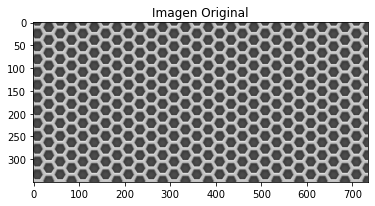

In [2]:
#Cargar la imagen
img = cv.imread('metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(1)
plt.imshow(img)
plt.title('Imagen Original')
plt.show

In [3]:
#Reduccion de ruido
blur = cv.GaussianBlur(gray,(5,5),0)

#Calculo de gradiente en X
SobelX_f = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3) #En float32
SobelX = np.absolute(SobelX_f)
GradX = SobelX/SobelX.max()*255 #Se lo transforma al rango 0-255 para uint8
GradX = np.uint8(GradX)

#Calculo de gradiente en Y
SobelY_f = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3) #En float32
SobelY = np.absolute(SobelY_f)
GradY = SobelY/SobelY.max()*255 #Se lo transforma al rango 0-255 para uint8
GradY = np.uint8(GradY)

#Calculo de gradiente en magnitud y angulo
Grad = np.hypot(GradX,GradY)
Grad = Grad/Grad.max()*255
Grad = np.uint8(Grad)
Angulo = np.arctan2(SobelY_f, SobelX_f)
Angulo = np.rad2deg(Angulo)

print("La magnitud del gradiente es:")
print(Grad)
print("El angulo del gradiente es:")
print(Angulo)

La magnitud del gradiente es:
[[  0   8   0 ...   0   0   0]
 [ 54  47  22 ...  51  51  51]
 [104 107  71 ...  55  55  55]
 ...
 [  2   6  12 ...   4   3   2]
 [  1   1   2 ...   4   3   1]
 [  0   0   0 ...   3   2   0]]
El angulo del gradiente es:
[[  0.       179.99998  179.99998  ...   0.       179.99998    0.      ]
 [ 90.       115.94229  130.60129  ... -89.383934 -91.8476   -90.      ]
 [ 90.       123.25001  140.7824   ... -88.85423  -92.2906   -90.      ]
 ...
 [-90.       -68.198586 -68.198586 ...  45.        56.309933  90.      ]
 [-90.       -90.       -78.69006  ...  33.690067  45.        90.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]


<function matplotlib.pyplot.show(*args, **kw)>

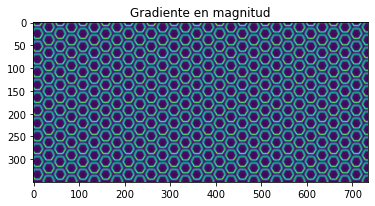

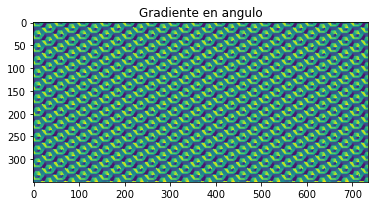

In [4]:
plt.figure(2)
plt.imshow(Grad)
plt.title('Gradiente en magnitud')
plt.show

plt.figure(3)
plt.imshow(Angulo)
plt.title('Gradiente en angulo')
plt.show

(350, 735)


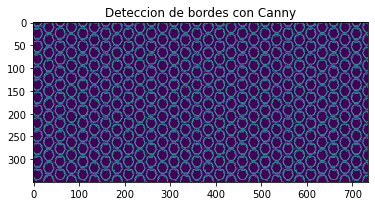

In [6]:
Canny = cv.Canny(img,40,105,L2gradient=True)
plt.figure(4)
plt.imshow(Canny)
plt.title('Deteccion de bordes con Canny')
plt.show